#  MMM com Mídia On e Off - Base de Dados

representação pelo Fusco – conceito mais a fundo do Marketing Mix Modeling

Resultados em várias frentes

Agrupar de forma mais coerente e melhorar a qualidade dos dados, para melhorar o modelo. 



### Coleta apenas o Fusca

Modelo considerará a Interação com o ambiente virtual com a interação com o ambiente offline. 

Primeira modelo com base nos dados on-line, fazendo regressões que no caso será multipla. 
    
Jornada do consumidor entre várias frentes, facebook, youtube, força de atração. 
    
ver a media plan, digital e como está sendo distribuida. 

In [199]:
import pandas as pd

df_Base_fusca = pd.read_excel("05_MMM_Base-Fusca.xlsx", sheet_name= "Base Fusca", skiprows=4, decimal=',', usecols=  ['Month', 'Facebook', 'Programática',
       'Youtube', 'UOL', 'Outros', 'Facebook.1', 'Programática.1', 'Youtube.1',
       'UOL.1', 'Outros.1'])
df_Base_fusca.tail()

,Month,Facebook,Programática,Youtube,UOL,Outros,Facebook.1,Programática.1,Youtube.1,UOL.1,Outros.1
13,2017-02-01,208994.980000,491499.464400,3222.930300,56715.758900,166924.346400,2681.60,100.56,33.52,30.5032,505.8168
14,2017-03-01,328435.620000,618041.868600,33521.000317,45935.497133,58349.993950,1504.95,57.15,38.10,15.6210,289.1790
15,2017-04-01,53297.100000,254391.701100,23625.100275,34653.107225,80334.221400,2141.16,76.47,101.96,24.2155,205.1945
16,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816
17,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282


In [200]:
# renomear colunas
df_Base_fusca.columns= [ 'Month', 'Facebook_investimento', 'Programática_investimento', 'Youtube_investimento', 'UOL_investimento', 'Outros_investimento', 'Facebook_leads', 'Programática_leads', 'Youtube_leads',
       'UOL_leads', 'Outros_leads']

In [201]:
df_Base_fusca.head()

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-01-01,60473.873061,143334.3077,29416.657409,22211.303080,15005.94875,1760.99,182.96,114.35,19.8969,208.8031
1,2016-02-01,52028.197184,122356.1975,12345.368987,14119.088829,30011.89750,1908.95,209.20,26.15,25.1040,445.5960
2,2016-03-01,228511.969582,377200.0550,82119.441529,49562.695139,17005.94875,1791.33,50.46,100.92,23.4639,556.8261
3,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.90040,2468.20,282.08,35.26,32.0866,708.3734
4,2016-05-01,145988.500300,330060.9572,10578.876833,52894.384167,95209.89150,2874.40,251.51,35.93,31.6184,399.5416


Variável em x do investimento é separado, mas a y, que é o leads, tem que ser junta.
    
Somar todos os valores do leads para depois trabalhar no modelo. 

In [202]:
df_Base_fusca['total_leads']= df_Base_fusca['Facebook_leads'] + df_Base_fusca['Programática_leads'] + df_Base_fusca['Youtube_leads']+ df_Base_fusca['UOL_leads'] +df_Base_fusca['Outros_leads']

In [203]:
df_Base_fusca

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,2287.0
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960,2615.0
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261,2523.0
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,3526.0
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416,3593.0
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588,4964.0
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170,2010.0
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840,2520.0
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325,2277.0
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,2504.0


Maio e junho de 20217 serão para teste

ação nova e não tem como mensurar colocar como outros

In [204]:
# obter dados do investimento de julho e agosto de 2017
df_Media_Plan = pd.read_excel("05_MMM_Base-Fusca.xlsx", sheet_name= "Media Plan", skiprows=3, decimal=',', usecols=['Unnamed: 2'	,'JULHO',	'AGOSTO'])
df_Media_Plan

,Unnamed: 2,JULHO,AGOSTO
0,TV ABERTA,NaN,NaN
1,GLOBO,NaN,NaN
2,MÍDIA AVULSA,7.900258e+06,6.929357e+06
3,NaN,NaN,NaN
4,BAND,NaN,NaN
5,MASTER CHEF,3.200352e+05,4.000440e+05
6,MASTER CHEF (Reaplicação),4.561280e+05,4.561280e+05
7,MÍDIA AVULSA,2.410416e+05,1.402607e+05
8,NaN,NaN,NaN
9,PAY TV,NaN,NaN


In [205]:
# Somar as tabelas digitais de julho e agosto.

df_Media_Plan_digital = df_Media_Plan[16:25]
df_Media_Plan_digital

,Unnamed: 2,JULHO,AGOSTO
16,DIGITAL,NaN,NaN
17,AOL,243965.000,241715.000
18,GLOBO.COM,10650.000,10150.000
19,UOL (AVULSO),233437.500,73062.500
20,GOOGLE - YOUTUBE (DIRETO),67500.000,67500.000
21,GOOGLE - PROGRAMÁTICA,769946.725,743423.405
22,FACEBOOK,1349476.405,1289899.465
23,DIVERSOS DESK (somar todos os veículos),153464.750,148607.250
24,MOBILE (exceto Google e FB - somar todos),102500.000,102500.000


In [206]:
df_share_digital= df_Media_Plan[27:].reset_index(drop=True).rename(columns={'Unnamed: 2':'Share (DIGITAL)'})
df_share_digital

,Share (DIGITAL),JULHO,AGOSTO
0,Fusca,0.30,0.30
1,Fiat 147,0.15,0.15
2,Passat Hatch,0.15,0.15
3,Passat Sedan,0.10,0.10
4,Tempra,0.10,0.10
5,Buggy,0.10,0.10
6,Kombi,0.03,0.03
7,Rural,0.07,0.07


In [207]:
df_share_digital_fusca = df_share_digital.loc[df_share_digital['Share (DIGITAL)'] == 'Fusca']
df_share_digital_fusca

,Share (DIGITAL),JULHO,AGOSTO
0,Fusca,0.3,0.3


In [208]:
df_Base_fusca.columns

Index(['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads', 'total_leads'],
      dtype='object')

In [209]:
df_Base_fusca.tail()

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads
13,2017-02-01,208994.980000,491499.464400,3222.930300,56715.758900,166924.346400,2681.60,100.56,33.52,30.5032,505.8168,3352.0
14,2017-03-01,328435.620000,618041.868600,33521.000317,45935.497133,58349.993950,1504.95,57.15,38.10,15.6210,289.1790,1905.0
15,2017-04-01,53297.100000,254391.701100,23625.100275,34653.107225,80334.221400,2141.16,76.47,101.96,24.2155,205.1945,2549.0
16,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816,3826.0
17,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282,2249.0


In [210]:
df_Base_fusca.loc[18,'Month'] = '2017-07-01'
df_Base_fusca.loc[19,'Month'] = '2017-08-01'

In [211]:
# facebook
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='FACEBOOK']['JULHO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['JULHO'].values[0]
df_Base_fusca.loc[18,'Facebook_investimento'] = midia_invest*share
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='FACEBOOK']['AGOSTO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['AGOSTO'].values[0]
df_Base_fusca.loc[19,'Facebook_investimento'] = midia_invest*share


In [212]:
# GOOGLE - PROGRAMÁTICA	
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GOOGLE - PROGRAMÁTICA']['JULHO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['JULHO'].values[0]
df_Base_fusca.loc[18,'Programática_investimento'] = midia_invest*share
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GOOGLE - PROGRAMÁTICA']['AGOSTO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['AGOSTO'].values[0]
df_Base_fusca.loc[19,'Programática_investimento'] = midia_invest*share


In [213]:
# GOOGLE - YOUTUBE (DIRETO)	
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GOOGLE - YOUTUBE (DIRETO)']['JULHO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['JULHO'].values[0]
df_Base_fusca.loc[18,'Youtube_investimento'] = midia_invest*share
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GOOGLE - YOUTUBE (DIRETO)']['AGOSTO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['AGOSTO'].values[0]
df_Base_fusca.loc[19,'Youtube_investimento'] = midia_invest*share

In [214]:
# UOL (AVULSO)	
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='UOL (AVULSO)']['JULHO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['JULHO'].values[0]
df_Base_fusca.loc[18,'UOL_investimento'] = midia_invest*share
midia_invest = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='UOL (AVULSO)']['AGOSTO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['AGOSTO'].values[0]
df_Base_fusca.loc[19,'UOL_investimento'] = midia_invest*share

In [215]:
# OUTROS	
midia_invest1 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='AOL']['JULHO'].values[0]
midia_invest2 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GLOBO.COM']['JULHO'].values[0]
midia_invest3 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='DIVERSOS DESK (somar todos os veículos)']['JULHO'].values[0]
midia_invest4 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='MOBILE (exceto Google e FB - somar todos)']['JULHO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['JULHO'].values[0]
df_Base_fusca.loc[18,'Outros_investimento'] = (midia_invest1+midia_invest2+midia_invest3+midia_invest4)*share


midia_invest1 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='AOL']['AGOSTO'].values[0]
midia_invest2 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='GLOBO.COM']['AGOSTO'].values[0]
midia_invest3 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='DIVERSOS DESK (somar todos os veículos)']['AGOSTO'].values[0]
midia_invest4 = df_Media_Plan_digital.loc[df_Media_Plan_digital['Unnamed: 2']=='MOBILE (exceto Google e FB - somar todos)']['AGOSTO'].values[0]
share = df_share_digital_fusca.loc[df_share_digital_fusca['Share (DIGITAL)']=='Fusca']['AGOSTO'].values[0]
df_Base_fusca.loc[19,'Outros_investimento'] = (midia_invest1+midia_invest2+midia_invest3+midia_invest4)*share


In [216]:
df_Base_fusca


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,2287.0
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960,2615.0
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261,2523.0
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,3526.0
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416,3593.0
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588,4964.0
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170,2010.0
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840,2520.0
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325,2277.0
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,2504.0


## de janeiro/2016 até abril/2017 para análise da parte estatística 

In [217]:
df_Base_fusca[:16]

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads
0,2016-01-01,60473.873061,143334.3077,29416.657409,22211.303080,15005.94875,1760.99,182.96,114.35,19.8969,208.8031,2287.0
1,2016-02-01,52028.197184,122356.1975,12345.368987,14119.088829,30011.89750,1908.95,209.20,26.15,25.1040,445.5960,2615.0
2,2016-03-01,228511.969582,377200.0550,82119.441529,49562.695139,17005.94875,1791.33,50.46,100.92,23.4639,556.8261,2523.0
3,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.90040,2468.20,282.08,35.26,32.0866,708.3734,3526.0
4,2016-05-01,145988.500300,330060.9572,10578.876833,52894.384167,95209.89150,2874.40,251.51,35.93,31.6184,399.5416,3593.0
5,2016-06-01,189697.708860,391937.4150,65453.548305,50559.926535,86226.23130,3871.92,297.84,99.28,41.2012,653.7588,4964.0
6,2016-07-01,142408.233800,374758.5100,96844.813750,58087.569050,77417.89340,1508.00,40.20,40.20,16.6830,404.9170,2010.0
7,2016-08-01,117147.529820,355391.3826,38171.667020,61864.425860,85557.18470,1965.60,176.40,25.20,20.9160,331.8840,2520.0
8,2016-09-01,190300.119460,440363.9128,9436.369560,51900.032580,94363.69560,1593.90,136.62,22.77,17.0775,506.6325,2277.0
9,2016-10-01,113164.169100,351404.5251,25167.000650,43677.398600,62187.79655,2053.28,125.20,125.20,21.0336,179.2864,2504.0


In [218]:
# não significa que o R2 baixo teremos um modelo que não fique bem ajustado. Vamos analisar mais a fundo.

import statsmodels.formula.api as smf
# dados completos soma_geral_treino
df_estatistico = df_Base_fusca[:16]
# Modelo com fórmula
# Modelo com fórmula corrigida (usando + para somar variáveis)
modelo = smf.ols("total_leads ~ Facebook_investimento + Programática_investimento + Youtube_investimento + UOL_investimento + Outros_investimento", data=df_Base_fusca).fit()

# Estatísticas de regressão
resumo = modelo.summary()

resumo

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_leads   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1.767
Date:                Tue, 13 May 2025   Prob (F-statistic):              0.194
Time:                        10:05:46   Log-Likelihood:                -142.85
No. Observations:                  18   AIC:                             297.7
Df Residuals:                      12   BIC:                             303.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1951.2951    640.330      3.047      0.010     556.136    3346.455
Facebook_investimento         0.0136      0.008      1.671      0.121      -0.004       0.031
Programática_investimento    -0.0103      0.006     -1.773      0.102      -0.023       0.002
Youtube_investimento          0.0127      0.010      1.239      0.239      -0.010       0.035
UOL_investimento              0.0016      0.030      0.053      0.959      -0.064       0.068
Outros_investimento           0.0251      0.011      2.296      0.040       0.001       0.049
==============================================================================
Omnibus:                        0.017   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.226
Skew:                           0.022   Prob(JB):                        0.893
Kurtosis:                       2.452   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# analisar o P>|t|	

In [219]:
import statsmodels.api as sm

# ANOVA
anova = sm.stats.anova_lm(modelo, typ=2)

print('\nANOVA:')
display(anova)


ANOVA:


,sum_sq,df,F,PR(>F)
Facebook_investimento,1.917788e+06,1.0,2.790937,0.120653
Programática_investimento,2.160150e+06,1.0,3.143645,0.101583
Youtube_investimento,1.055528e+06,1.0,1.536099,0.238892
UOL_investimento,1.924238e+03,1.0,0.002800,0.958668
Outros_investimento,3.622295e+06,1.0,5.271488,0.040492
Residual,8.245780e+06,12.0,NaN,NaN


In [220]:
# Para calcular o erro padrão geral (RMSE ou erro padrão residual) entre o eixo X (Investimentos) e Y (Leads)
# Erro padrão
import numpy as np
from sklearn.metrics import mean_squared_error
# Selecionar as variáveis independentes (X) e dependente (y)
x = df_estatistico[[
    'Facebook_investimento',
    'Programática_investimento',
    'Youtube_investimento',
    'UOL_investimento',
    'Outros_investimento'
]]
y = df_estatistico['total_leads']    
# Predição
y_pred2 = modelo.predict(x)    
# Erro padrão geral (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred2))
print(f'Erro padrão geral -  Erro Quadrático Médio (RMSE): {rmse:.2f}')



Erro padrão geral -  Erro Quadrático Médio (RMSE): 656.25


In [221]:
from sklearn.linear_model import LinearRegression
modelo2 = LinearRegression()
modelo2.fit(x, y)
# Predição
y_pred = modelo2.predict(x)
r2 = modelo2.score(x, y)  # R-quadrado
r2

0.46296469202562107

In [222]:
Coeficientes_intercepto = modelo2.intercept_
Coeficientes_investimento_face = modelo2.coef_[0]
Coeficientes_investimento_programa = modelo2.coef_[1]
Coeficientes_investimento_youtube = modelo2.coef_[2]
Coeficientes_investimento_uol = modelo2.coef_[3]
Coeficientes_investimento_outros = modelo2.coef_[4]

print(f'Intercepto: {modelo2.intercept_:.4f}  (Coeficientes Interseção) ')

print(f'Coeficiente angular (slope) Facebook no Fusca: {Coeficientes_investimento_face:.4f}  (Coeficientes investimento)')
print(f'Coeficiente angular (slope) Programático no Fusca: {Coeficientes_investimento_programa:.4f}  (Coeficientes investimento)')
print(f'Coeficiente angular (slope) Youtube no Fusca: {Coeficientes_investimento_youtube:.4f}  (Coeficientes investimento)')
print(f'Coeficiente angular (slope) Uol no Fusca: {Coeficientes_investimento_uol:.4f}  (Coeficientes investimento)')
print(f'Coeficiente angular (slope) Outros no Fusca: {Coeficientes_investimento_outros:.4f}  (Coeficientes investimento)')



Intercepto: 1848.7503  (Coeficientes Interseção) 
Coeficiente angular (slope) Facebook no Fusca: 0.0132  (Coeficientes investimento)
Coeficiente angular (slope) Programático no Fusca: -0.0100  (Coeficientes investimento)
Coeficiente angular (slope) Youtube no Fusca: 0.0129  (Coeficientes investimento)
Coeficiente angular (slope) Uol no Fusca: 0.0045  (Coeficientes investimento)
Coeficiente angular (slope) Outros no Fusca: 0.0237  (Coeficientes investimento)


In [223]:
# Coeficientes (incluindo o intercepto)
coeficientes = modelo.params

# Intercepto (constante)
coef_intercepto = coeficientes['Intercept']

# Coeficientes das variáveis independentes
coef_facebook = coeficientes['Facebook_investimento']
coef_programatica = coeficientes['Programática_investimento']
coef_youtube = coeficientes['Youtube_investimento']
coef_uol = coeficientes['UOL_investimento']
coef_outros = coeficientes['Outros_investimento']

print('dados estatísticos do investimento e leads do Fusca')
print("Intercepto (Coeficientes Interseção) :", coef_intercepto)
print("Facebook:", coef_facebook)
print("Programática:", coef_programatica)
print("YouTube:", coef_youtube)
print("UOL:", coef_uol)
print("Outros:", coef_outros)

dados estatísticos do investimento e leads do Fusca
Intercepto (Coeficientes Interseção) : 1951.295076194262
Facebook: 0.01364655718637106
Programática: -0.010308141841413059
YouTube: 0.01269431386030174
UOL: 0.0016032311331226345
Outros: 0.025077780123888


Olhar o Valor-P e analisar o nível de significância de 95%. Ou seja, o maior valor aceitável do value-p seria 5%, ou 0,05.
                                                                                                                      
Mas podemos aceitar valores maiores, como 15 ou 13%. 24% como o youtube entra, pois é essencial esse veículo de comunicação  


In [224]:
display(resumo)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_leads   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1.767
Date:                Tue, 13 May 2025   Prob (F-statistic):              0.194
Time:                        10:05:46   Log-Likelihood:                -142.85
No. Observations:                  18   AIC:                             297.7
Df Residuals:                      12   BIC:                             303.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1951.2951    640.330      3.047      0.010     556.136    3346.455
Facebook_investimento         0.0136      0.008      1.671      0.121      -0.004       0.031
Programática_investimento    -0.0103      0.006     -1.773      0.102      -0.023       0.002
Youtube_investimento          0.0127      0.010      1.239      0.239      -0.010       0.035
UOL_investimento              0.0016      0.030      0.053      0.959      -0.064       0.068
Outros_investimento           0.0251      0.011      2.296      0.040       0.001       0.049
==============================================================================
Omnibus:                        0.017   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.226
Skew:                           0.022   Prob(JB):                        0.893
Kurtosis:                       2.452   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No excel

Dados-> analise de dados


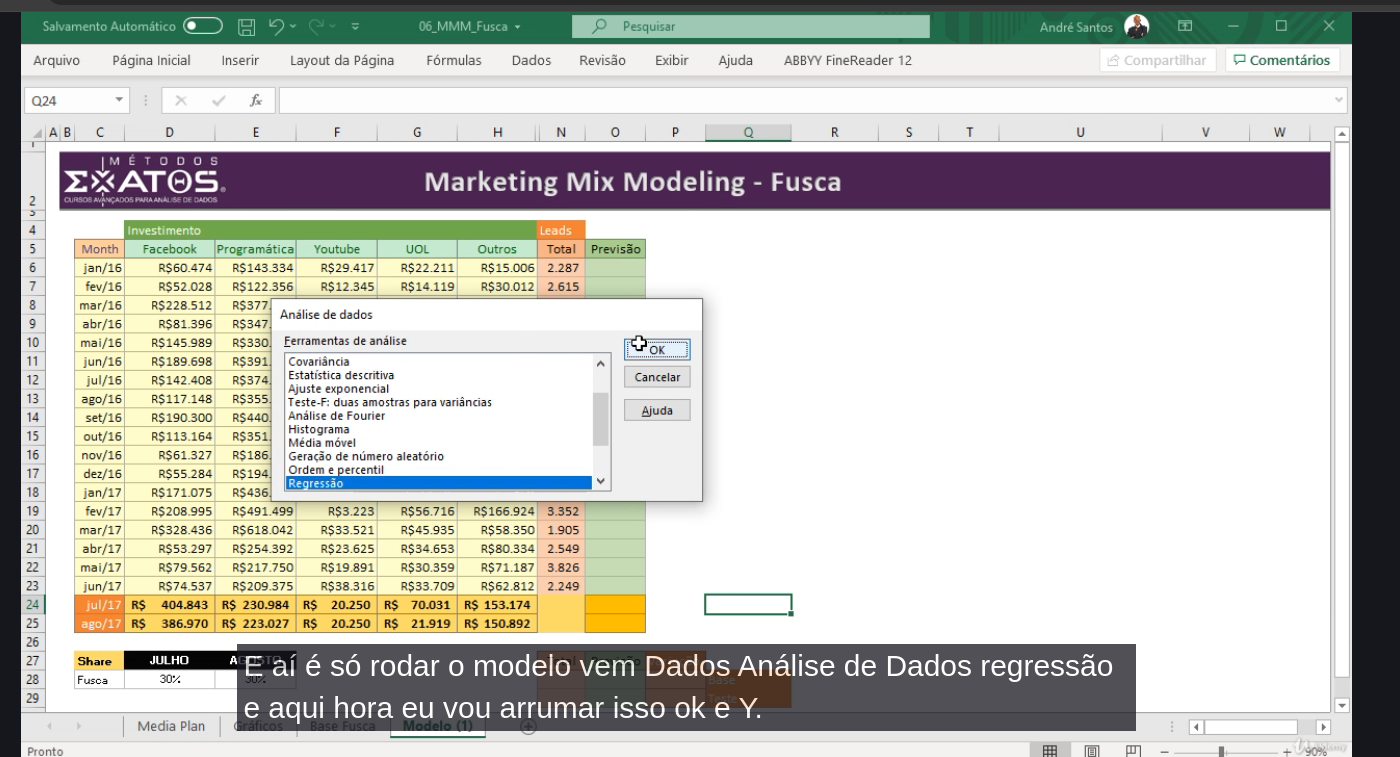


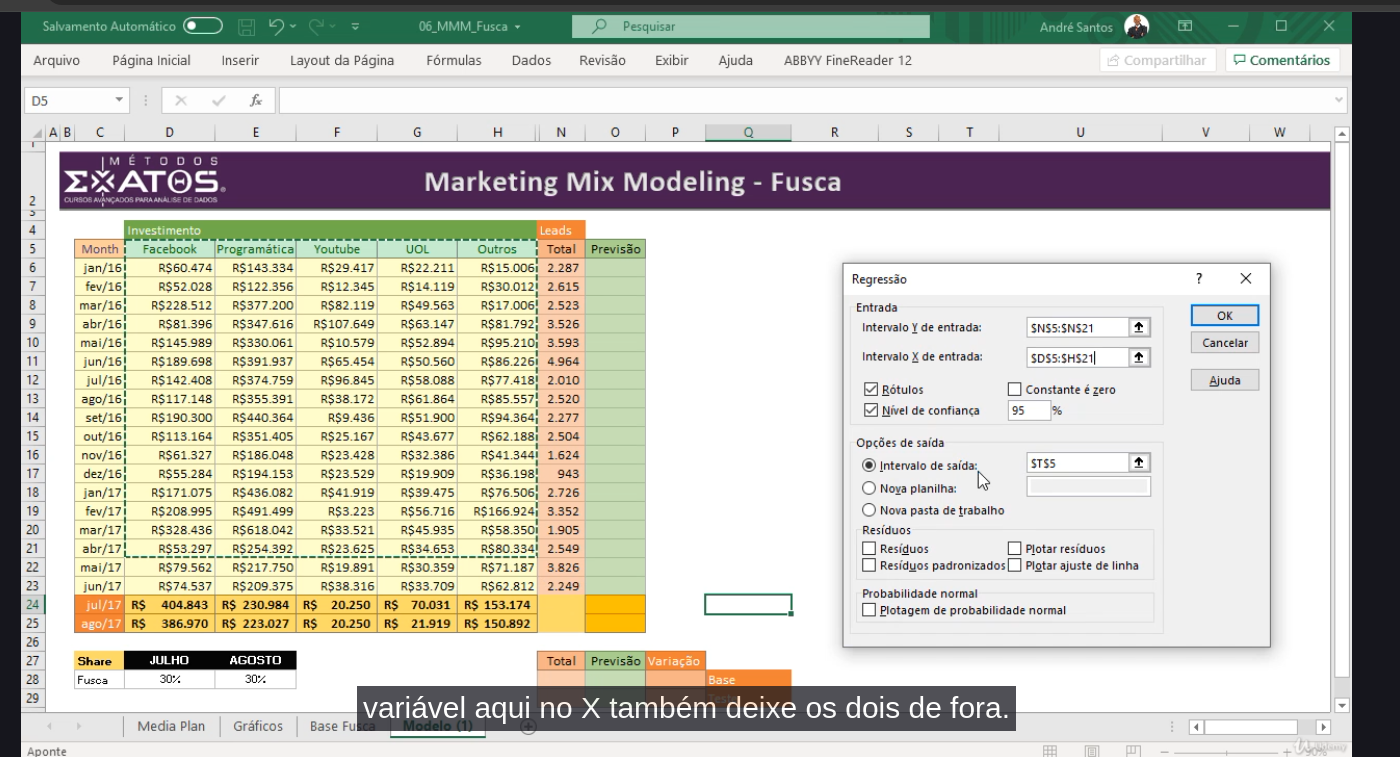


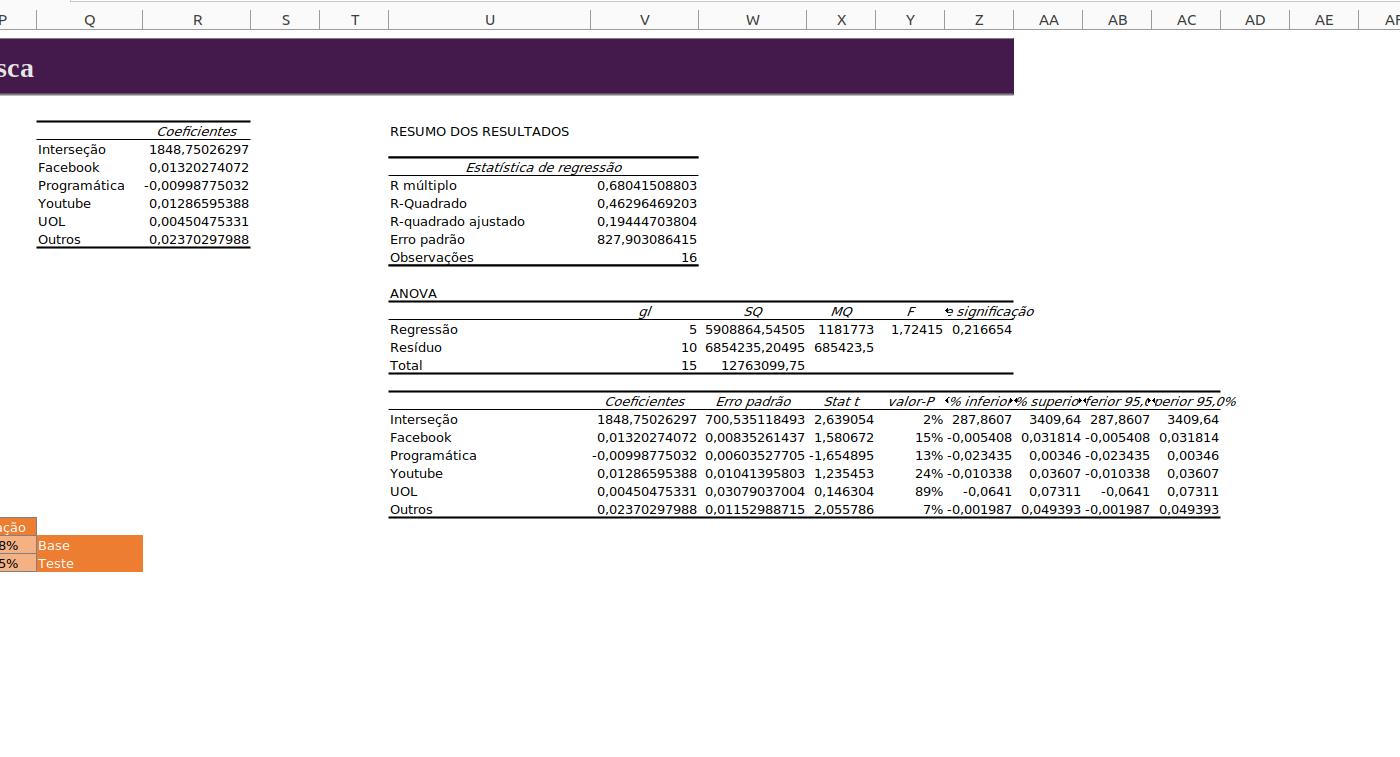



In [225]:
df_Base_fusca.columns

Index(['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads', 'total_leads'],
      dtype='object')

In [226]:
print('dados estatísticos do investimento e leads do Fusca')
print("Intercepto (Coeficientes Interseção) :", coef_intercepto)
print("Facebook:", coef_facebook)
print("Programática:", coef_programatica)
print("YouTube:", coef_youtube)
print("UOL:", coef_uol)
print("Outros:", coef_outros)

dados estatísticos do investimento e leads do Fusca
Intercepto (Coeficientes Interseção) : 1951.295076194262
Facebook: 0.01364655718637106
Programática: -0.010308141841413059
YouTube: 0.01269431386030174
UOL: 0.0016032311331226345
Outros: 0.025077780123888


In [227]:
df_Base_fusca['Previsao_leads']= coef_intercepto + df_Base_fusca['Facebook_investimento']*coef_facebook + df_Base_fusca['Programática_investimento']*coef_programatica +  df_Base_fusca['Youtube_investimento'] *coef_youtube +  df_Base_fusca['UOL_investimento'] *coef_uol  + df_Base_fusca['Outros_investimento'] *coef_outros 

In [228]:
df_Base_fusca

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads,Previsao_leads
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,2287.0,2084.394886
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960,2615.0,2332.019723
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261,2523.0,2729.846932
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,3526.0,2997.726563
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416,3593.0,3147.966562
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588,4964.0,3574.178845
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170,2010.0,3295.588474
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840,2520.0,2615.861121
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325,2277.0,2578.330859
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,2504.0,1822.303352


# somar o total e a previsão de janeiro de 2016 à junho de 2017 => treino

In [229]:
total_leads_geral = df_Base_fusca.loc[df_Base_fusca['Month']<='2017-06-03']['total_leads'].sum()
Previsao_leads_geral= df_Base_fusca.loc[df_Base_fusca['Month']<='2017-06-03']['Previsao_leads'].sum()

print(f"""
Soma do Total real de leads de janeiro/2016 à junho/2017 : {total_leads_geral:,.2f}
Soma da Previsão de leads de janeiro/2016 à junho/2017 : {Previsao_leads_geral:,.2f}


Cálculo da variação = 1 - previsto/real da base geral Treino + teste
Cálculo da variação do Teste: {(1- Previsao_leads_geral/total_leads_geral)*100:.2f} %

""")


Soma do Total real de leads de janeiro/2016 à junho/2017 : 47,993.00
Soma da Previsão de leads de janeiro/2016 à junho/2017 : 47,993.00


Cálculo da variação = 1 - previsto/real da base geral Treino + teste
Cálculo da variação do Teste: 0.00 %




# Somar o teste, maio e junho de 2017 total e previsão

In [230]:
total_leads_teste= df_Base_fusca.loc[(df_Base_fusca['Month']<='2017-06-03') & (df_Base_fusca['Month']>='2017-05-01') ]['total_leads'].sum()
Previsao_leads_teste= df_Base_fusca.loc[(df_Base_fusca['Month']<='2017-06-03') & (df_Base_fusca['Month']>='2017-05-01')]['Previsao_leads'].sum()

print(f"""
Dados de teste da parte do Fusca 
Soma do Total real de leads de maio/2017 à junho/2017 : {total_leads_teste:,.2f}
Soma da Previsão de leads de maio/2017 à junho/2017 : {Previsao_leads_teste:,.2f}

Cálculo da variação = 1 - previsto/real => dos dados de teste
Cálculo da variação do Teste: {(1- Previsao_leads_teste/total_leads_teste)*100:.2f} %

""")
# dados próximos e foram suavizados



Dados de teste da parte do Fusca 
Soma do Total real de leads de maio/2017 à junho/2017 : 6,075.00
Soma da Previsão de leads de maio/2017 à junho/2017 : 5,804.69

Cálculo da variação = 1 - previsto/real => dos dados de teste
Cálculo da variação do Teste: 4.45 %




In [231]:
df_Base_fusca

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,total_leads,Previsao_leads
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,2287.0,2084.394886
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960,2615.0,2332.019723
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261,2523.0,2729.846932
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,3526.0,2997.726563
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416,3593.0,3147.966562
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588,4964.0,3574.178845
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170,2010.0,3295.588474
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840,2520.0,2615.861121
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325,2277.0,2578.330859
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,2504.0,1822.303352
